In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
sns.set()

In [2]:
df=pd.read_csv("adidas-2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
Product Name     3268 non-null object
Product ID       3268 non-null object
Listing Price    3268 non-null int64
Sale Price       3268 non-null int64
Discount         3268 non-null int64
Brand            3268 non-null object
Description      3265 non-null object
Rating           3268 non-null float64
Reviews          3268 non-null int64
Last Visited     3268 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


In [4]:
df.shape

(3268, 10)

In [5]:
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [6]:
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [7]:
df['Product ID'].value_counts()

CD6720-808    3
CT3110-400    2
BQ3177-100    2
844127-108    2
AT8000-104    2
             ..
CL7607        1
B37469        1
CQ2035        1
CL7453        1
EE7155        1
Name: Product ID, Length: 3179, dtype: int64

In [8]:
df1=df.drop_duplicates(subset ="Product ID", keep = 'last')

In [9]:
df1.shape

(3179, 10)

In [21]:
df1['Brand'].value_counts()

Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Adidas SPORT PERFORMANCE     606
Nike                         554
Adidas Adidas ORIGINALS        1
Name: Brand, dtype: int64

In [31]:
df1.groupby('Brand').mean()

,Listing Price,Sale Price,Discount,Rating,Reviews
Brand,,,,,
Adidas Adidas ORIGINALS,14999.000000,7499.000000,50.000000,4.800000,41.000000
Adidas CORE / NEO,4951.835284,3116.212421,36.300630,3.412331,48.205221
Adidas ORIGINALS,9814.766262,6811.679162,31.113561,3.321940,49.286659
Adidas SPORT PERFORMANCE,9132.168317,6322.742574,31.732673,3.346205,48.853135
Nike,4097.906137,10248.445848,0.000000,2.791516,7.476534


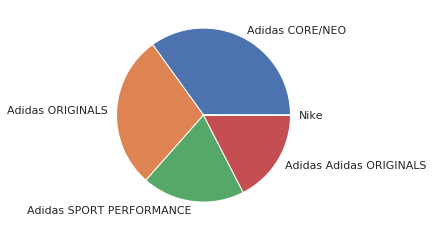

In [24]:
label = ['Adidas CORE/NEO ','Adidas ORIGINALS','Adidas SPORT PERFORMANCE','Adidas Adidas ORIGINALS','Nike']
plt.pie(df1['Brand'].value_counts(),labels=label)
plt.show()

In [36]:
df2=df1.groupby('Brand').mean()
df3=df2['Sale Price']
df3

Brand
Adidas Adidas ORIGINALS      7499.000000
Adidas CORE / NEO            3116.212421
Adidas ORIGINALS             6811.679162
Adidas SPORT PERFORMANCE     6322.742574
Nike                        10248.445848
Name: Sale Price, dtype: float64

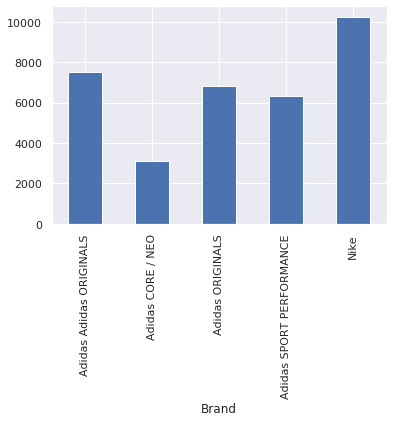

In [40]:
df3.plot.bar()